In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score, confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow import keras
import keras
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatemehnaeinian","key":"53a796fd33a454499555252adf7d8362"}'}

In [5]:
! mkdir ~/.kaggle


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d umangjpatel/ham10000-imagenet-style-dataset

100% 2.58G/2.58G [01:09<00:00, 42.5MB/s]
100% 2.58G/2.58G [01:09<00:00, 40.0MB/s]


In [9]:
! unzip /content/ham10000-imagenet-style-dataset.zip -d data 

Streaming output truncated to the last 5000 lines.
  inflating: data/nv/ISIC_0026994.jpg  
  inflating: data/nv/ISIC_0026997.jpg  
  inflating: data/nv/ISIC_0026998.jpg  
  inflating: data/nv/ISIC_0026999.jpg  
  inflating: data/nv/ISIC_0027000.jpg  
  inflating: data/nv/ISIC_0027001.jpg  
  inflating: data/nv/ISIC_0027002.jpg  
  inflating: data/nv/ISIC_0027003.jpg  
  inflating: data/nv/ISIC_0027005.jpg  
  inflating: data/nv/ISIC_0027007.jpg  
  inflating: data/nv/ISIC_0027009.jpg  
  inflating: data/nv/ISIC_0027010.jpg  
  inflating: data/nv/ISIC_0027011.jpg  
  inflating: data/nv/ISIC_0027012.jpg  
  inflating: data/nv/ISIC_0027013.jpg  
  inflating: data/nv/ISIC_0027014.jpg  
  inflating: data/nv/ISIC_0027015.jpg  
  inflating: data/nv/ISIC_0027016.jpg  
  inflating: data/nv/ISIC_0027019.jpg  
  inflating: data/nv/ISIC_0027020.jpg  
  inflating: data/nv/ISIC_0027022.jpg  
  inflating: data/nv/ISIC_0027024.jpg  
  inflating: data/nv/ISIC_0027028.jpg  
  inflating: data/nv/ISIC_002

In [10]:
!rm -rf '/content/data/akiec'
!rm -rf '/content/data/mel'
!rm -rf '/content/data/vasc'
!rm -rf '/content/data/nv'

In [34]:
!mkdir Data
!mkdir Data/train
!mkdir Data/train/bcc
!mkdir Data/train/bkl
!mkdir Data/train/df

!mkdir Data/val
!mkdir Data/val/bcc
!mkdir Data/val/bkl
!mkdir Data/val/df

!mkdir Data/test
!mkdir Data/test/bcc
!mkdir Data/test/bkl
!mkdir Data/test/df



!mkdir databcc
!mkdir databkl
!mkdir datadf

mkdir: cannot create directory ‘databcc’: File exists
mkdir: cannot create directory ‘databkl’: File exists
mkdir: cannot create directory ‘datadf’: File exists


In [35]:

image_generator1 = ImageDataGenerator(validation_split=0.2, 
                                     rescale=1./255,
                                     shear_range = 0.6,
                                     zoom_range = 0.6,
                                     rotation_range=120,
                                     vertical_flip=True,
                                     horizontal_flip = True)    



i = 0
for batch in image_generator1.flow_from_directory(directory='databcc',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="training",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/train/bcc', 
                                                  save_prefix='aug',
                                                  save_format='jpg'):

    i += 1
    if i > 80: 
        break  

i = 0
for batch in image_generator1.flow_from_directory(directory='databcc',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="validation",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/val/bcc', 
                                                  save_prefix='aug',
                                                  save_format='jpg'):

    i += 1
    if i > 10: 
        break  

i = 0
for batch in image_generator1.flow_from_directory(directory='databcc',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="validation",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/test/bcc', 
                                                  save_prefix='aug',
                                                  save_format='jpg'):

    i += 1
    if i > 10:
        break  


i = 0
for batch in image_generator1.flow_from_directory(directory='datadf',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="training",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/train/df', 
                                                  save_prefix='aug',
                                                  save_format='jpg'):

    i += 1
    if i > 84: 
        break  

i = 0
for batch in image_generator1.flow_from_directory(directory='datadf',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="validation",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/val/df', 
                                                  save_prefix='aug',
                                                  save_format='jpg'):

    i += 1
    if i > 12: 
        break  

i = 0
for batch in image_generator1.flow_from_directory(directory='datadf',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="validation",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/test/df', 
                                                  save_prefix='aug',
                                                  save_format='jpg'):

    i += 1
    if i > 12: 
        break 


Found 412 images belonging to 1 classes.
Found 102 images belonging to 1 classes.
Found 102 images belonging to 1 classes.
Found 92 images belonging to 1 classes.
Found 23 images belonging to 1 classes.
Found 23 images belonging to 1 classes.


In [36]:
# !rm -rf '/content/Data'

In [37]:
image_generator2 = ImageDataGenerator(rescale=1./255, validation_split=0.2)    
i = 0
for batch in image_generator2.flow_from_directory(directory='databkl',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="training",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/train/bkl', 
                                                  save_prefix='raw',
                                                  save_format='jpg'):

    i += 1
    if i > 80: 
        break  

i = 0
for batch in image_generator2.flow_from_directory(directory='databkl',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="validation",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/val/bkl', 
                                                  save_prefix='raw',
                                                  save_format='jpg'):

    i += 1
    if i > 10: 
        break 
i = 0
for batch in image_generator2.flow_from_directory(directory='databkl',
                                                  target_size=(64,64),
                                                  class_mode='categorical', 
                                                  subset="validation",
                                                  shuffle=True,
                                                  batch_size=10,
                                                  save_to_dir='Data/test/bkl', 
                                                  save_prefix='raw',
                                                  save_format='jpg'):

    i += 1
    if i > 10: 
        break  


Found 880 images belonging to 1 classes.
Found 219 images belonging to 1 classes.
Found 219 images belonging to 1 classes.


In [38]:
image_generator = ImageDataGenerator()    
train = image_generator.flow_from_directory(batch_size=100,
                                                 directory='Data/train',
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 class_mode='categorical')

valid = image_generator.flow_from_directory(batch_size=50,
                                                 directory='Data/val',
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 class_mode='categorical')


test = image_generator.flow_from_directory(batch_size=50,
                                                 directory='Data/test',
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 class_mode='categorical')


Found 2398 images belonging to 3 classes.
Found 314 images belonging to 3 classes.
Found 314 images belonging to 3 classes.


In [56]:
import os

dir_path = '/content/Data/train/bcc'
print('train/bcc',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/train/bkl'
print('train/bkl',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/train/df'
print('train/df',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/val/bcc'
print('val/bcc',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/val/bkl'
print('val/bkl',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/val/df'
print('val/df',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/test/bcc'
print('test/bcc',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/test/bkl'
print('test/bkl',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = '/content/Data/test/df'
print('test/df',len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

train/bcc 802
train/bkl 810
train/df 786
val/bcc 102
val/bkl 110
val/df 102
test/bcc 102
test/bkl 110
test/df 102


In [40]:
base_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling="max",
    classes=3,
    classifier_activation="relu",
)
base_model.trainable = False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [41]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.Flatten(),
                          keras.layers.Dense(4096, activation="relu",kernel_initializer='he_uniform'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1000, activation="relu",kernel_initializer='he_uniform'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(400, activation="relu",kernel_initializer='he_uniform'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(200, activation="relu",kernel_initializer='he_uniform'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(50, activation="relu",kernel_initializer='he_uniform'),

                          keras.layers.Dense(3,activation="softmax")

                          ])
model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                                 
 dense_7 (Dense)             (None, 1000)              4097000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 400)              

In [42]:
history = model.fit(train, epochs=100 , validation_data=valid)

Epoch 1/100
24/24 [==============================] - 4s 146ms/step - loss: 13.2383 - accuracy: 0.4629 - val_loss: 1.1136 - val_accuracy: 0.6592
Epoch 2/100
24/24 [==============================] - 2s 68ms/step - loss: 2.6522 - accuracy: 0.5609 - val_loss: 0.6515 - val_accuracy: 0.6497
Epoch 3/100
24/24 [==============================] - 2s 68ms/step - loss: 1.2049 - accuracy: 0.5822 - val_loss: 0.6653 - val_accuracy: 0.6051
Epoch 4/100
24/24 [==============================] - 2s 68ms/step - loss: 0.8622 - accuracy: 0.6280 - val_loss: 0.6630 - val_accuracy: 0.6274
Epoch 5/100
24/24 [==============================] - 2s 68ms/step - loss: 0.7453 - accuracy: 0.6585 - val_loss: 0.6118 - val_accuracy: 0.6688
Epoch 6/100
24/24 [==============================] - 2s 68ms/step - loss: 0.6623 - accuracy: 0.6852 - val_loss: 0.5808 - val_accuracy: 0.6911
Epoch 7/100
24/24 [==============================] - 2s 68ms/step - loss: 0.6071 - accuracy: 0.7056 - val_loss: 0.5689 - val_accuracy: 0.6847
Epoc

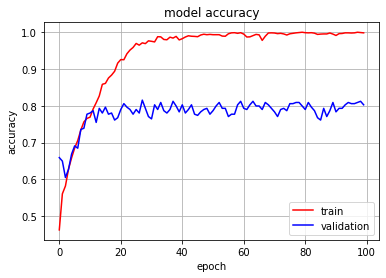

In [43]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

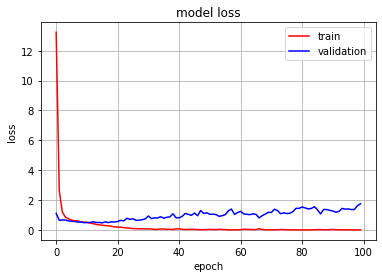

In [44]:
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [51]:
Y_pred = model.predict(test)
y_pred = np.argmax(Y_pred, axis=1)
Y_test = test.labels


7/7 [==============================] - 0s 38ms/step


In [52]:
y_pred.sort()

In [53]:
test_loss,test_accuracy = model.evaluate(test)
print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
    # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
precision = precision_score(Y_test, y_pred, average='macro')
print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
recall = recall_score(Y_test, y_pred, average='macro')
print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

7/7 [==============================] - 0s 36ms/step - loss: 2.3626 - accuracy: 0.7611
test loss = 2.362585
test accuracy = 0.761146
Accuracy: 0.898089
Precision: 0.906140
Recall: 0.900178
F1 score: 0.899090


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       102
           1       0.88      0.82      0.85       110
           2       1.00      0.88      0.94       102

    accuracy                           0.90       314
   macro avg       0.91      0.90      0.90       314
weighted avg       0.91      0.90      0.90       314



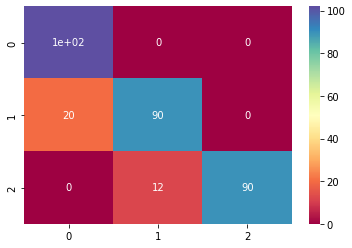

In [54]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
print(classification_report(Y_test, y_pred))
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat, annot=True, cmap='Spectral')